# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import matplotlib.pyplot as plt
import matplotlib
import tkinter
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
import matplotlib.patches as patches
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
dataset = get_dataset("./data/processed/*.tfrecord")

2021-12-25 07:21:35.408913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-25 07:21:35.442975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-25 07:21:35.443659: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-25 07:21:35.444634: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

INFO:tensorflow:Reading unweighted datasets: ['./data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2021-12-25 07:21:36.127195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-25 07:21:36.127262: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5944 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:01:00.0, compute capability: 7.5


In [3]:
dataset

<PrefetchDataset shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sha

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_instances(batch,fig, ax):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    try:    
        ax.imshow(batch["image"].numpy().astype("uint8"), interpolation='none')
        colors = {1: 'red', 2: 'blue', 4: 'green'}
        shapes = batch["original_image_spatial_shape"].numpy()
    
        for cla, box in zip(batch["groundtruth_classes"].numpy(), batch["groundtruth_boxes"].numpy()):
            y1, x1, y2, x2 = box
            y1 *= shapes[0]
            y2 *= shapes[0]
            x1 *= shapes[1]
            x2 *= shapes[1]
            rec = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), facecolor='none', edgecolor=colors[cla])
            ax.add_patch(rec)
    
        plt.axis("off")
    except Exception as err:
        print (err)

<Figure size 1440x720 with 0 Axes>

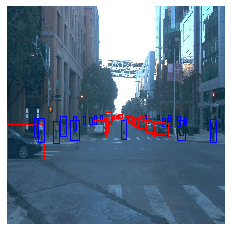

In [5]:
batch, = dataset.take(1)
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(nrows=1, ncols=1) 
display_instances(batch, fig, ax)

In [6]:
plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

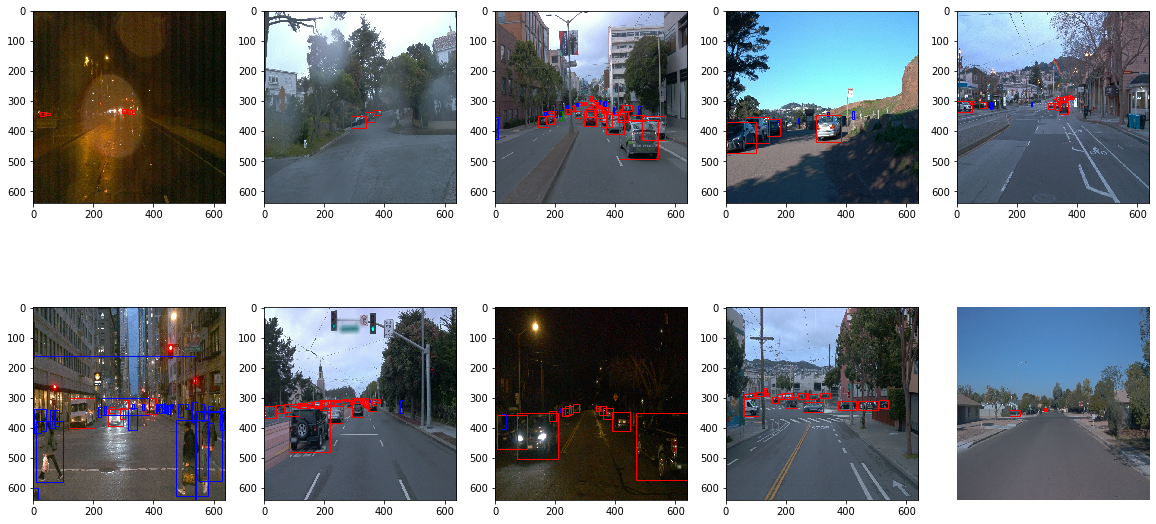

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10)) 
for i in ax.flatten():
    for batch in dataset.shuffle(75, reshuffle_each_iteration=True).take(1):
        display_instances(batch, fig, i)

In [8]:
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [9]:
dists = []
ca = []
ca_lens=[]
pe = []
pe_lens=[]
cy = []
cy_lens=[]
for i in range(500):
    #print (i)
    img, = dataset.shuffle(100, reshuffle_each_iteration=True).take(1)
    dists=dists+list(img["groundtruth_classes"].numpy())
    unique, counts = np.unique(img["groundtruth_classes"].numpy(), return_counts=True)
    try:
        ca.append(dict(zip(unique, counts))[1])
        ca_lens.append(len(img["groundtruth_classes"].numpy()))
    except:
        pass
    try:
        pe.append(dict(zip(unique, counts))[2])
        pe_lens.append(len(img["groundtruth_classes"].numpy()))
    except:
        pass
    try:
        cy.append(dict(zip(unique, counts))[4])
        cy_lens.append(len(img["groundtruth_classes"].numpy()))
    except:
        pass

In [10]:
len(ca_lens)

486

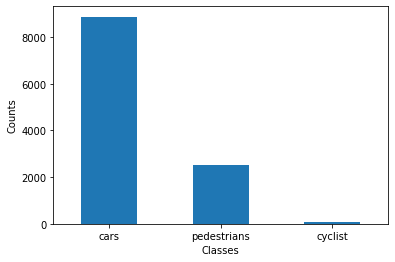

In [11]:
data = pd.DataFrame(columns=['dists'],data=dists)
data = data.replace({1: "cars",2: "pedestrians",4: "cyclist"})
data['dists'].value_counts().plot.bar(rot=0)
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

Text(0, 0.5, 'Counts')

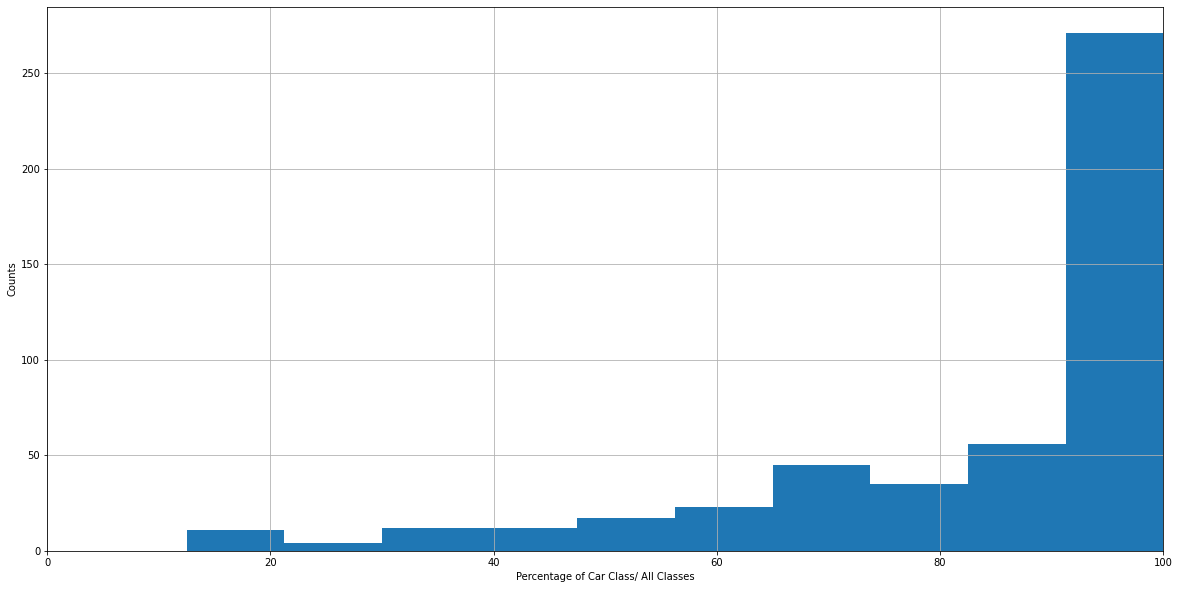

In [12]:
data = pd.DataFrame(columns=['cars'],data=ca)
data['lens']=ca_lens
data['percentage']=(data['cars']/data['lens'])*100
plt.figure(figsize=(20,10))
data['percentage'].hist(bins=10)
plt.xlim([0, 100])
plt.xlabel("Percentage of Car Class/ All Classes")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

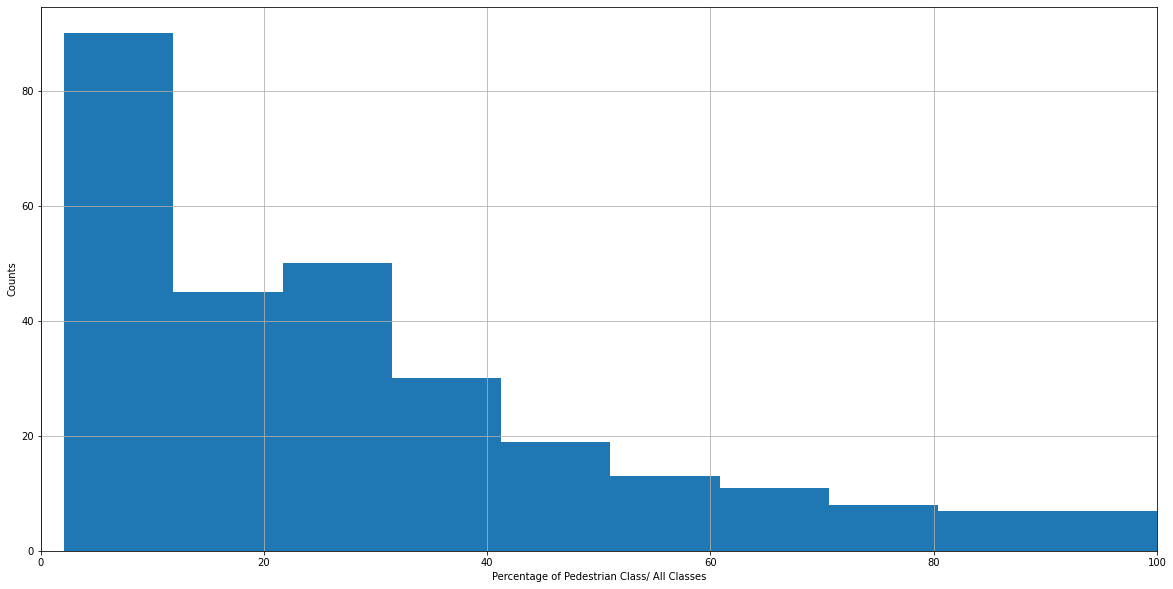

In [13]:
data = pd.DataFrame(columns=['pedestrians'],data=pe)
data['lens']=pe_lens
data['percentage']=(data['pedestrians']/data['lens'])*100
plt.figure(figsize=(20,10))
data['percentage'].hist(bins=10)
plt.xlim([0, 100])
plt.xlabel("Percentage of Pedestrian Class/ All Classes")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

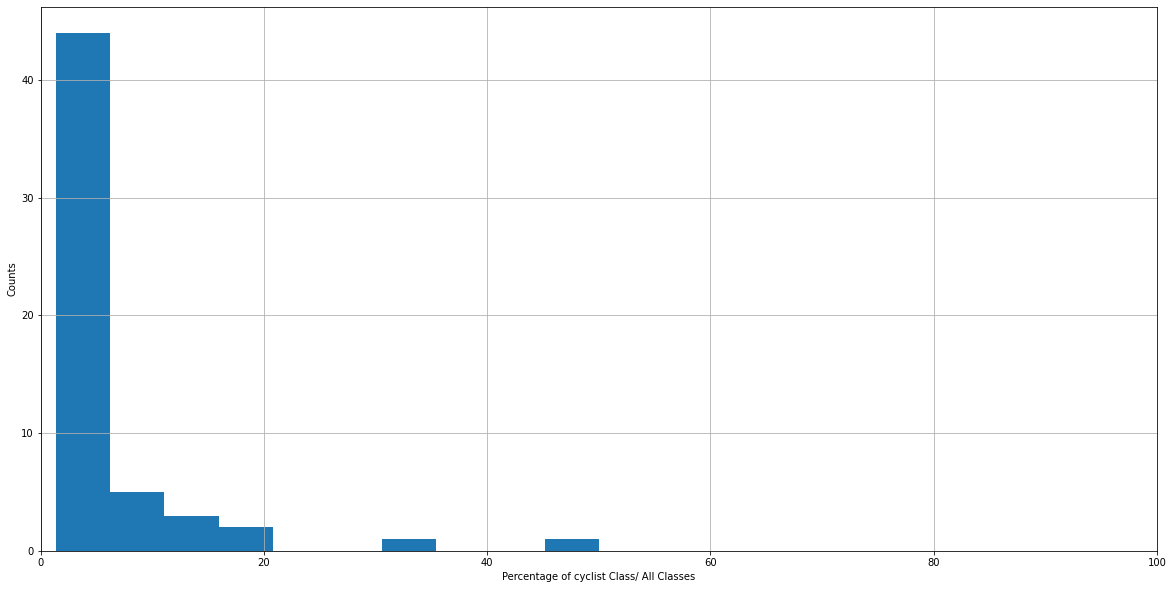

In [14]:
data = pd.DataFrame(columns=['cyclist'],data=cy)
data['lens']=cy_lens
data['percentage']=(data['cyclist']/data['lens'])*100
plt.figure(figsize=(20,10))
data['percentage'].hist(bins=10)
plt.xlim([0, 100])
plt.xlabel("Percentage of cyclist Class/ All Classes")
plt.ylabel("Counts")